<a href="https://colab.research.google.com/github/DDxk/MyKaggle/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

最近准备正式开始研究Kaggle，在科赛网上找到了一个很棒的教程，学习了一下，还是有坑，以后逐渐完善填坑然后打Kaggle！https://www.kesci.com/home/project/5af18c294b7639369e6c289c

# Titanic: Machine Learning from Disaster
# 1.数据导入与分析
** 1.1 模块导入**

 **1.2 数据导入**
 
1.2.1 数据内容可视化理解

1.2.2 数据类型缺失值,所占内存了解

1.2.3 数据统计信息初步了解

** 1.3 数据简单预处理**
# 2.数据分析与特征工程
** 2.2 数据分析与特征构造**

2.2.1 Sex 特征 <br />
2.2.2 Name特征 <br />
2.2.3 Ticket特征 <br />
2.2.4 Cabin特征 <br />
2.2.5 Embarked 特征 <br />
2.2.6 SibSp特征 <br />
2.2.7 Parch 特征 <br />
插曲:SibSp + Parch 特征 <br />
2.2.8 Pclass 特征 <br />
2.2.9 Age 特征<br />
2.2.10 Fare 特征<br />
# 3.模型训练
** 3.1 训练集,测试集准备**

 **3.2 模型训练**
 
**3.3 模型特征重要性检测**
# 4.算法结果提交
# 5.总结

# 1.数据导入与分析
**1.1 模块导入**

In [0]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  #新版本改动 注意有替换
import seaborn as sns

%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate   #新版本改动 注意有替换


**1.2数据导入**
**1.2.1 数据内容可视化理解**

此处我们对数据进行导入,然后初步观测数据的形式,对数据有一个大致的了解. 训练和测试集数据导入之后,我们得到下述结论： **训练集和测试集中的数据存在数值型数据,字符型数据,还有一些缺失值**

In [0]:
train = pd.read_csv('/content/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
test = pd.read_csv('/content/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**1.2.2 数据类型缺失值,所占内存了解**

此处我们对数据的大小,类型,缺失值的情况进一步进行了解.(主要通过info函数进行了解) 我们得到下述结论：

**训练集：**

(1). 数据中训练集一共有891个样本,所有数据所占的内存大小为83.6K

(2). 所有的特征中有两个特征确实情况较为严重,一个是Age,一个是Cabin;一个缺失不严重Embarked.(Category型数据用众数进行填充)

(3). 我们的数据一共有三种类型,float64(2), int64(5), object(5)

**测试集：**

(1). 数据中训练集一共有418个样本,所有数据所占的内存大小为36.0K

(2). 所有的特征中有两个特征确实情况较为严重,一个是Age,一个是Cabin;一个缺失不严重Fare(数值型数据用均值进行填充)

(3). 我们的数据一共有三种类型,float64(2), int64(4), object(5)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**1.2.3 数据统计信息初步了解**

此处我们对数据的一些统计信息进行了解,这一步可以发现一些奇异值,了解数据分布. 我们得到下述结论：

**训练集和测试集各个特征的分布类似,所以我们可以假设是iid采样的.**

**训练集：**

(1). 存活的比例为0.383838

(2). Fare价格中出现了含有0的情况,而且分布的范围较大(建议进行log处理)

**测试集：**

(1). Fare价格中出现了含有0的情况,而且分布的范围较大(建议进行log处理),因为我们发现了一些极大值512,对于这些值可以考虑进行线上拟合<font color = red>(因为数量少,然后可以直接得到真实label,后续train的时候将这些值去掉，不过本篇notebook并未这样处理)</font>

In [0]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**1.3 数据简单预处理**

**由前面的分析，我们这边对数据进行简单的预处理，具体的：**

Fare和Embarked缺失较少，可以直接用均值和众数进行填充；Age的缺失中等，此处直接用均值/中位数进行填充


In [0]:
fare_mean = train['Fare'].mean()
test.loc[pd.isnull(test.Fare),'Fare']= fare_mean
embarked_mode = train['Embarked'].mode()
train.loc[pd.isnull(train.Embarked),['Embarked']] = embarked_mode[0]
train.loc[pd.isnull(train.Age),['Age']]= train['Age'].mean()
test.loc[pd.isnull(test.Age),['Age']] = test['Age'].mean()

# 2.数据分析与特征工程
**2.1 数据分割**

很多时候,我们会在做完特征工程之后然后对训练数据进行分割,分别作为训练集和验证集,但是很多时候我们还是会发现做完特征工程之后CV的结果会非常好,但是 一旦用于测试发现线上线下的效果差距却非常的大,这里面很大一部分原因<font color = red>（个人见解）</font>在于,我们在做特征工程的时候,有一些特征在 训练集合上与label有很强的关系,但是却在测试集上却相对弱很多;举个例子就是我们train一个model能在训练集上达到与label90+% 的关系,但是测试集、 上却只有70%的关系,而很多特征,我们可以认为其就是一个弱分类器,之所以用了这些弱分类器的结果而不出现过拟合,很大一部分原因是该特征在训练集和测试集上与label的关系类似.


---


<font color = red>此处我将训练集先进行拆分,分为训练集和验证机；用来模拟训练集和测试集的关系，如果在训练集和验证集上我们发现某特征与label的关系相差不大且都有一定的统计特性,我们就将其作为我们的好特征.</font>

In [0]:
label = train['Survived']
train.drop('Survived',axis=1,inplace=True)
X_train,X_test,Y_train,Y_test = train_test_split(train,label,test_size=0.3,random_state = 1)
X_train['Survived']=Y_train
X_test['Survived'] = Y_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


# 2.2 数据分析与特征构造

**2.2.1 Sex 特征**

对性别变量进行分析,我们发现训练集和验证集上female和male的存活率类似,也就是说sex这个特征在训练集和测试集上理应也会有类似的分布情况

同时我们发现男的存活概率非常低,而是女的存活概率非常高,也就是说该特征具有非常好的统计特征,因为其是一个category型的数据,我们直接进行one_hot编码.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


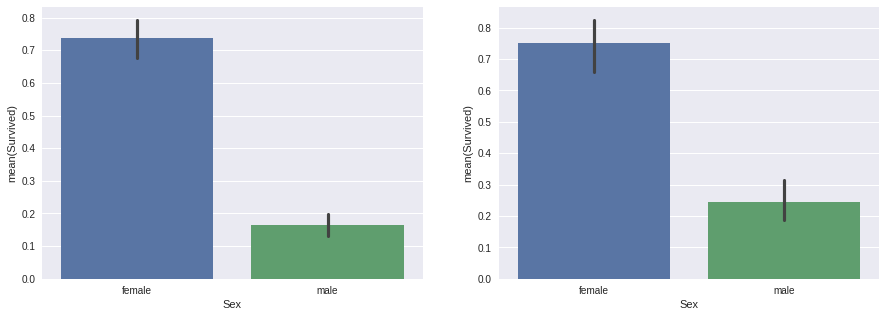

In [0]:
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('Sex','Survived', data =X_train, ax = axis1)
sns.barplot('Sex','Survived', data =X_test, ax = axis2)

In [0]:
train['Sex'] = train['Sex'].apply(lambda x: 1 if  x == 'male' else 0 )
test['Sex'] = test['Sex'].apply(lambda x: 1 if x == 'male' else 0)
train = pd.get_dummies(data= train,columns =['Sex'])
test = pd.get_dummies(data= test,columns=['Sex'])

**2.2.2 Name特征**

对于名字这类特征,我们看两个特征,一个是尊称,尊称可以反映一个人的地位,性别等信息;另一个是名字的长度,因为名字的长度与一个人的家乡有关,例如名字长的在中国往往是少数名族等,所以可能与我们的存活率也有关;

**尊称**

看名字毫无疑问要先看尊称，我们发现尊称为Mr.的name在训练集和验证集中的存活率极低(同时Mr.的人数也较多),而尊称为Mrs.或者Miss.的存活率则高于平均水平，同时因为其人数也较多,所以我们考虑将其分开编码，而至于其他的例如Ms.,Lady,Mlle.Mme.人数较少,所以我们认为其统计性较弱,为了方便，我们将其直接与Mrs.当做一类(存活率都非常高同时都是女性),还有一个Rev.的特殊尊称,因为这个尊称的存活率为0同时人数也达到了7个,所以我们也将其直接编码,剩余的我们直接当做一类编码.

**名字长度**

看名字的时候我们发现姓名长度在15到27之间的训练集和验证集上存活率都较为低,所以我们将其作为一个特征(<font color = red>如果感觉统计特性较弱,同时感觉名字长度这个特征比较不放心,可能在测试集上与训练集上存在较大的偏差,也可以不处理,此处我就仅仅保留名字长度这个特征,不做编码</font>)

In [0]:
def Name_Title_Code(x):
  if x== 'MR.':
    return 1
  if (x =='Mrs') or (x=='Lady.') or (x== 'Mlle.') or (x =='Mme'):
    return 2
  if x== 'Miss':
    return 3
  if x== 'Rev.':
    return 4
  return 5

In [0]:
X_train['Name_Title'] = X_train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

X_test['Name_Title'] = X_test['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])


In [0]:
X_train.groupby('Name_Title')['Survived'].count()

Name_Title
Capt.        1
Col.         2
Don.         1
Dr.          4
Lady.        1
Major.       1
Master.     27
Miss.      126
Mlle.        1
Mme.         1
Mr.        365
Mrs.        87
Rev.         5
the          1
Name: Survived, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


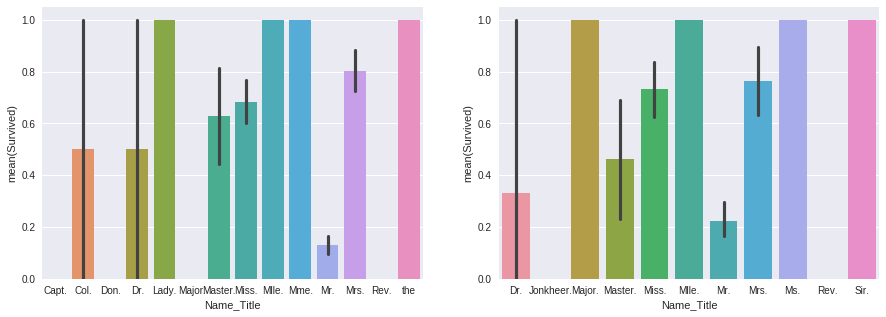

In [0]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('Name_Title', 'Survived', data=X_train.sort_values('Name_Title'), ax=axis1) 
sns.barplot('Name_Title', 'Survived', data=X_test.sort_values('Name_Title'), ax=axis2)

In [0]:
def Name_Title_Code(x):
  if x== 'Mr.':
    return 1
  if (x=='Mrs.') or (x=='Mr.') or (x=='Lady.') or (x =='Mile.') or (x =='Mme'):
    return 2
  if x=='Miss':
    return 3
  if x=='Rev.':
    return 4
  return 5
  

In [0]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
test['Name_Title'] = test['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

train['Name_Title'] = train['Name_Title'].apply(Name_Title_Code)
test['Name_Title'] = test['Name_Title'].apply(Name_Title_Code)

In [0]:
train = pd.get_dummies(columns = ['Name_Title'],data = train)
test = pd.get_dummies(columns = ['Name_Title'],data = test)

train.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_0,Sex_1,Name_Title_1,Name_Title_2,Name_Title_4,Name_Title_5
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,1,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1,1,0,0,0


In [0]:
X_train['Name_len'] = X_train['Name'].apply(lambda x : len(x))
X_test['Name_len'] = X_test['Name'].apply(lambda x: len(x))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


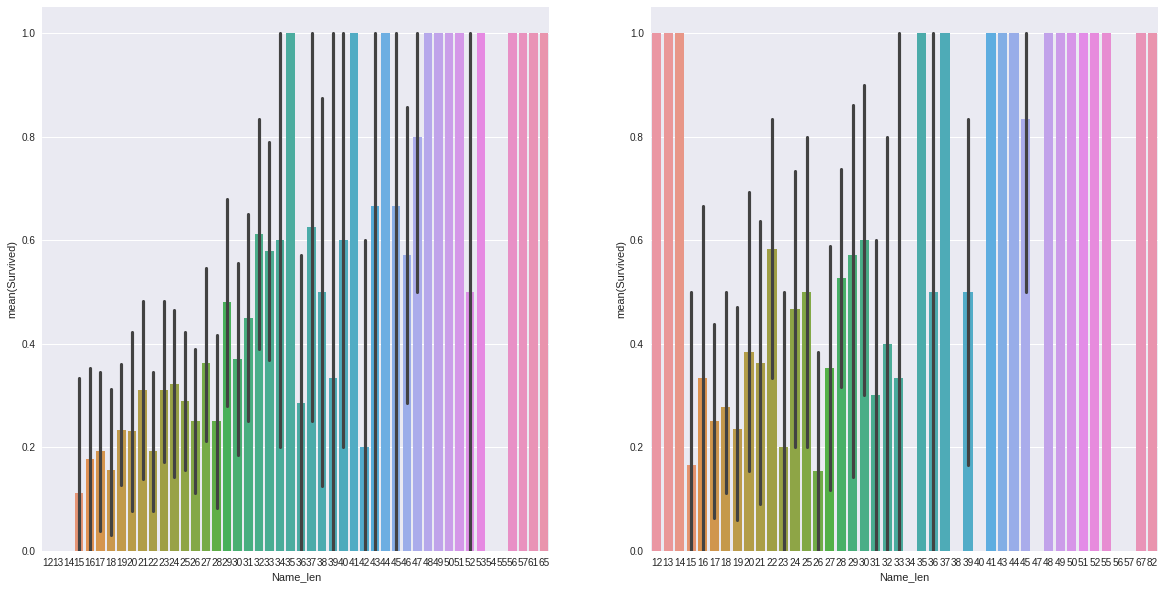

In [0]:
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(20,10))
sns.barplot('Name_len','Survived',data=X_train.sort_values(['Name_len']),ax=axis1)
sns.barplot('Name_len','Survived',data=X_test.sort_values(['Name_len']),ax=axis2)

In [0]:
train['Name_len'] = train['Name'].apply(lambda x: len(x))
test['Name_len'] = test['Name'].apply(lambda x: len(x))

# def Name_len_code(x):
#     if ((x<28) & (x>=15)):
#         return 1
#     return 2 

# train['Name_len'] = train['Name_len'].apply(Name_len_code)
# test['Name_len'] = test['Name_len'].apply(Name_len_code)

**2.2.3 Ticket特征**

对于Ticket特征,我们找所有Ticket的共性,包括开头的第一个字母(往往象征着票的价格以及在船上的位置,有些票离逃生船近,那么存活的概率就大);

**Ticket首字母**

我们发现首字母为1,3,4,6,7,A,C,P,S,W这几个首字母开头的Ticket个数较多同时对应的存活率有一定的统计特性,所以我们考虑对其进行直接编码,剩余的我们当做一类处理.

In [0]:
def Ticket_Frist_Let(x):
  return x[0]


In [0]:
X_train['Ticket_Frist_Letter'] = X_train['Ticket'].apply(Ticket_Frist_Let)
X_test['Ticket_Frist_Letter'] = X_test['Ticket'].apply(Ticket_Frist_Let)

In [0]:
X_train.groupby('Ticket_Frist_Letter')['Survived'].count()

Ticket_Frist_Letter
1     87
2    129
3    225
4     10
5      2
6      6
7      6
8      1
9      1
A     20
C     32
F      3
L      3
P     49
S     40
W      9
Name: Survived, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


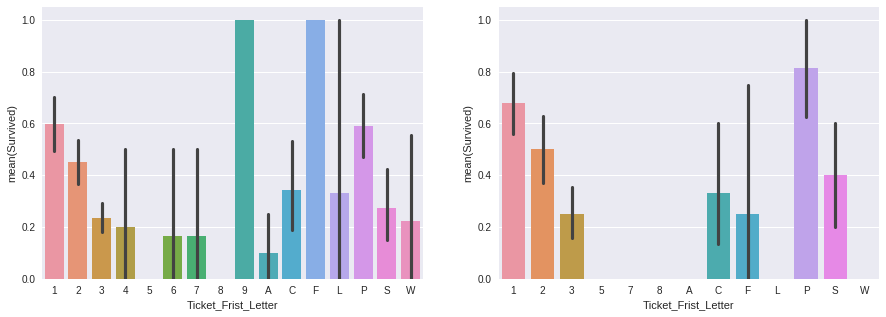

In [0]:
fig,(axis1,axis2) =plt.subplots(1,2,figsize=(15,5))

sns.barplot('Ticket_Frist_Letter','Survived',data=X_train.sort_values('Ticket_Frist_Letter'),ax=axis1)
sns.barplot('Ticket_Frist_Letter','Survived',data=X_test.sort_values('Ticket_Frist_Letter'),ax=axis2)



In [0]:
def Ticket_Frist_Letter_Code(x):
   if(x=='1'):
    return 1
   if(x =='3'):
    return 2
   if(x =='4'):
    return 3
   if(x =='C'):
    return 4
   if( x=='S'):
    return 5
   if(x =='P'):
    return 6
   if( x=='6'):
    return 7
   if(x =='7'):
    return 8
   if(x =='A'):
    return 9
   if(x =='W'):
    return 10
   return 11

In [0]:
train['Ticket_Frist_Letter'] = train['Ticket'].apply(Ticket_Frist_Let)
test['Ticket_Frist_Letter']=test['Ticket'].apply(Ticket_Frist_Let)

train['Ticket_Frist_Letter'].unique()

array(['A', 'P', 'S', '1', '3', '2', 'C', '7', 'W', '4', 'F', 'L', '9',
       '6', '5', '8'], dtype=object)

In [0]:
test['Ticket_Frist_Letter'].unique()

array(['3', '2', '7', 'A', '6', 'W', 'S', 'P', 'C', '1', 'F', '4', '9',
       'L'], dtype=object)

In [0]:
train['Ticket_Frist_Letter'] = train['Ticket_Frist_Letter'].apply(Ticket_Frist_Letter_Code)
test['Ticket_Frist_Letter'] = test['Ticket_Frist_Letter'].apply(Ticket_Frist_Letter_Code)

In [0]:
train = pd.get_dummies(columns = ['Ticket_Frist_Letter'],data = train)
test = pd.get_dummies(columns = ['Ticket_Frist_Letter'],data = test)


**2.2.4 Cabin特征**

对Cabin进行分析,因为Cabin存在大量的缺失值情况,所以毫无疑问缺失值在这边需要重点分析,我们发现Cabin开头字母为'D','B'的存活率居然高达70%以上，而缺失值的情况'XX',则是死亡率居高，所以考虑对其分别进行编码,而剩余的并没有在训练集和验证集上表现出较高的统计特性,所以我们将其作为另一类处理.

因为cabin是由数字和字母组成,所以此类数据我们还会考虑将数字从字母中抽取出来单独处理,这边对数字的操作在kaggle上其他的notebook中都有一定的线上性能的提升,这边第一个函数在我的尝试中线上性能没有显著提升,所以此处将其注释,不过平时还是建议使用.

def cabin_num(train test):
  for i in[train,test]:
    i['Cabin_numl'] = i['Cabin'].apply(lambda x : str(x).split(''[-1][1:]))
    i['Cabin_numl'].replace('an',np.NaN,inplace = True)
    i['Cabin_numl'] = i['Cabin'].apply(lambda x: int(x) if not pd.isnull(x) and x!='' else np.NaN)
    i['Cabin_numl'] = pd.qcut(train['Cabin_numl'],3 )
    
  train = pd.concat((train,pd.get_dummies(train['cabin_num'],prefix = 'cabin_num')),axis=1)
  test =  pd.concat((test,pd.get_dummies(test['cabin_num'],prefix = 'cabin_num')),axis=1)
  
  del train['cabin_num']
  del test['cabin_num']
  del train['cabin_numl']
  del test['cabin_numl']
  
  return train , test

train,test = cabin_num(train,test)

In [0]:
X_train['Cabin'] = X_train['Cabin'].fillna('Missing')
X_test['Cabin'] = X_test['Cabin'].fillna('Missing')
                                    

In [0]:
def Cabin_First_Letter(x):
  if x=='Missing':
    return 'XX'
  return x[0]

In [0]:
X_train['Cabin_First_Letter'] = X_train['Cabin'].apply( Cabin_First_Letter)
X_test['Cabin_First_Letter'] = X_test['Cabin'].apply( Cabin_First_Letter)

In [0]:
X_train.groupby('Cabin_First_Letter')['Survived'].count()
#X_train.groupby('Cabin_First_Letter')['Survived'].count()

Cabin_First_Letter
A      12
B      28
C      41
D      21
E      22
F       8
G       3
XX    488
Name: Survived, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


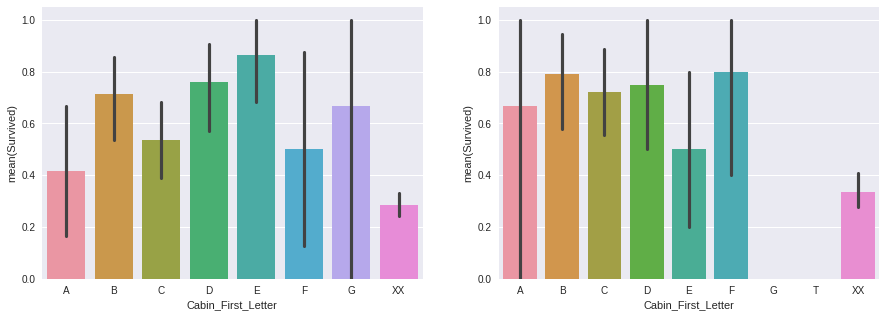

In [0]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('Cabin_First_Letter', 'Survived', data=X_train.sort_values('Cabin_First_Letter'), ax=axis1) 
sns.barplot('Cabin_First_Letter', 'Survived', data=X_test.sort_values('Cabin_First_Letter'), ax=axis2) 


In [0]:
def Cabin_First_Letter_Code(x):
  if x=='XX':
    return 1
  if x=='B':
    return 2
  if x=='C':
    return 3
  if x=='D':
    return 4
  return 5
  

In [0]:
train['Cabin']=train['Cabin'].fillna('Missing')
test['Cabin']=train['Cabin'].fillna('Missing')

train['Cabin_First_Letter'] = train['Cabin'].apply(Cabin_First_Letter)
test['Cabin_First_Letter']=test['Cabin'].apply(Cabin_First_Letter)

In [0]:
train['Cabin_First_Letter'] = train['Cabin_First_Letter'].apply(Cabin_First_Letter_Code)
test['Cabin_First_Letter'] = test['Cabin_First_Letter'].apply(Cabin_First_Letter_Code)

train = pd.get_dummies(columns = ['Cabin_First_Letter'],data=train)
test = pd.get_dummies(columns = ['Cabin_First_Letter'],data=test)

**2.2.5 Embarked特征**

对变量Embarked进行分析,我们发现Embarked为S或者Q的概率都低于40%,也就是说S,Q这两个变量具有一点统计特性,虽然统计特性不是特别强,但是可以还是可以考虑直接加入作为候补.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


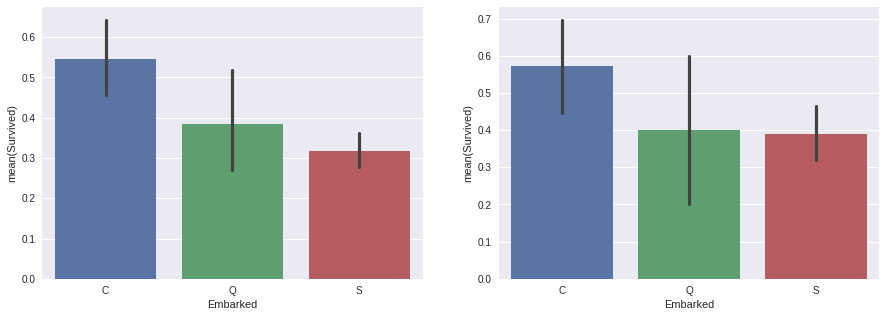

In [0]:
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('Embarked','Survived',data=X_train.sort_values('Embarked'),ax=axis1)
sns.barplot('Embarked','Survived',data=X_test.sort_values('Embarked'),ax=axis2)

In [0]:
train = pd.get_dummies(train,columns = ['Embarked'])
test = pd.get_dummies(test,columns = ['Embarked'])

**2.2.6 SibSp特征**

对SibSp单独分析,我们发现当SibSp为0和大于等于4时,在训练集和验证集上都拥有较低的存活率,所以我们对其进行编码.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


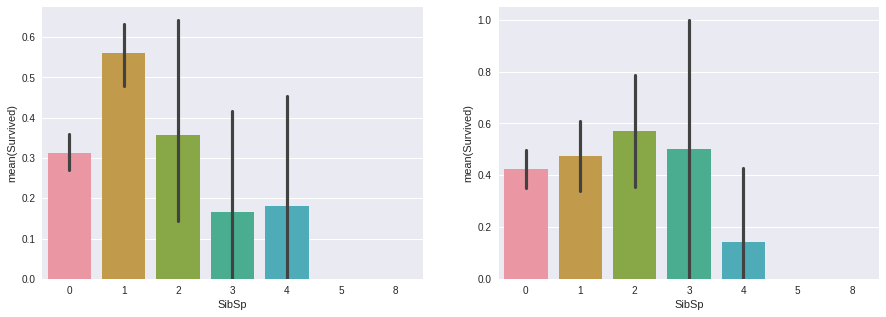

In [0]:
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('SibSp','Survived',data=X_train.sort_values('SibSp'),ax=axis1)
sns.barplot('SibSp','Survived',data=X_test.sort_values('SibSp'),ax=axis2)

def SibSp_code(x):
     if x == 0:
        return 1
    if x==3:
        return 2
     if x>=4:
        return 3
     return 4

 train['SibSp_code'] = train['SibSp'].apply(SibSp_code)
 test['SibSp_code'] = test['SibSp'].apply(SibSp_code)

 train = pd.get_dummies(train,columns = ['SibSp_code'])
 test = pd.get_dummies(test,columns = ['SibSp_code'])

**2.2.7 Parch特征**

对Parch单独分析,我们发现当Parch为0和大于等于4点时候,在训练集和验证集上都拥有较低的存活率,所以我们对其进行编码.

X_train.groupby('Parch')['Survived'].count()

 fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
 sns.barplot('Parch', 'Survived', data=X_train.sort_values('Parch'), ax=axis1) 
 sns.barplot('Parch', 'Survived', data=X_test.sort_values('Parch'), ax=axis2) 

 def Parch_code(x):
     if x == 0:
         return 1
     if x>=4:
         return 2 
     return 3

 train['Parch_code'] = train['Parch'].apply(Parch_code)
 test['Parch_code'] = test['Parch'].apply(Parch_code)

 train = pd.get_dummies(train,columns = ['Parch_code'])
 test = pd.get_dummies(test,columns = ['Parch_code'])

**<font color = red>2.2.6 SibSp特征 + 2.2.7 Parch特征 </font>**

因为SibSp和Parch是同一个量级的,所以可以进行加减乘除的操作,此处我们仅仅做加法操作，因为这样更加有物理意义,表示家庭的意思. 我们发现当Famaily大小为0点时候,这个时候存活率较低,当FamilySIze在1-3之间的时候存活率比较高,大于4点时候存活率普遍偏低.<font color = green>(这边4有一点争议,可以把4方一遍,此处我直接进行了编码) </font>

In [0]:
X_train['Fam_Size'] = X_train['SibSp'] + X_train['Parch']
X_test['Fam_Size'] = X_test['SibSp'] + X_test['Parch']

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


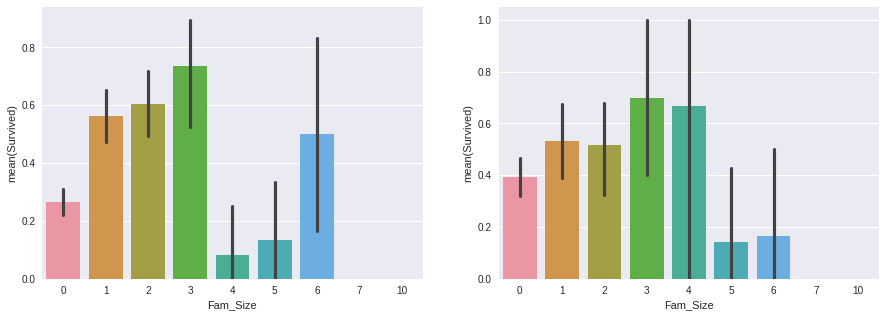

In [0]:
fig ,(axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('Fam_Size','Survived',data=X_train.sort_values('Parch'),ax=axis1)
sns.barplot('Fam_Size','Survived',data=X_test.sort_values('Parch'),ax=axis2)

In [0]:
def Family_feature(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test 
train, test  = Family_feature(train, test)

train = pd.get_dummies(train,columns = ['Fam_Size']) 
test =  pd.get_dummies(test,columns = ['Fam_Size']) 

**2.2.8. Pclass特征**

此处我们看一下Pclass对应的存活的概率，我们发现Pclass = 1的存活概率高于60%，而Pclass = 3的存活概率低于30%,同时在训练集和验证集上的存活概率分布类似,于是我们直接进行编码.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


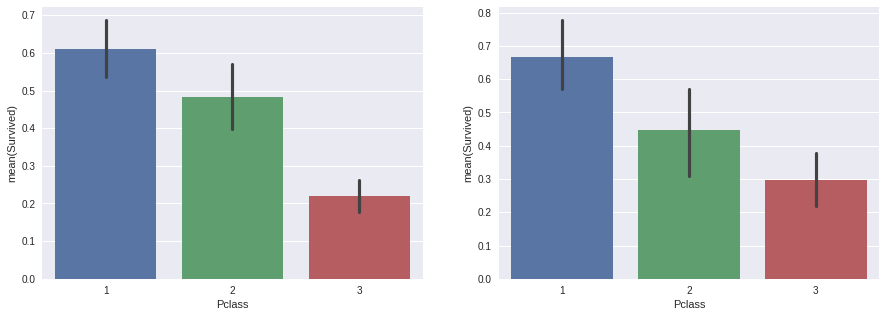

In [0]:
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('Pclass','Survived',data=X_train.sort_values('Pclass'),ax=axis1)
sns.barplot('Pclass','Survived',data=X_test.sort_values('Pclass'),ax=axis2)


In [0]:
train['Pclass_1']  = np.int32(train['Pclass'] == 1)  
train['Pclass_2']  = np.int32(train['Pclass'] == 2)  
train['Pclass_3']  = np.int32(train['Pclass'] == 3)  

test['Pclass_1']  = np.int32(test['Pclass'] == 1)  
test['Pclass_2']  = np.int32(test['Pclass'] == 2)  
test['Pclass_3']  = np.int32(test['Pclass'] == 3) 

**2.2.9 Age特征**

我们在看一下Age对应的存活率的分布情况，发现<=6岁的时候存活率非常高,而大于等于65的时候存活率极低,同样的在15到35之间的死亡率明显高于存活的.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


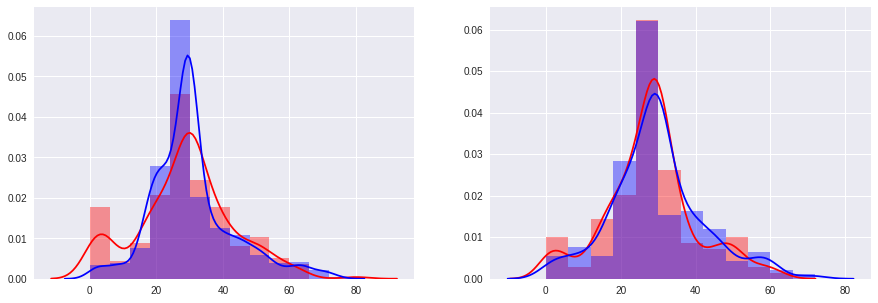

In [0]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5)) 
sns.distplot(X_train[X_train.Survived==1]['Age'].dropna().values, bins=range(0, 81, 6),color='red', ax=axis1) 
sns.distplot(X_train[X_train.Survived==0]['Age'].dropna().values, bins=range(0, 81, 6),color = 'blue', ax=axis1) 

sns.distplot(X_test[X_test.Survived==1]['Age'].dropna().values, bins=range(0, 81, 6),color='red', ax=axis2) 
sns.distplot(X_test[X_test.Survived==0]['Age'].dropna().values, bins=range(0, 81, 6),color = 'blue', ax=axis2)

In [0]:
train['Small_Age'] = np.int32(train['Age']<= 5)
train['Old_Age'] = np.int32(train['Age']>=65)
train['Middle_Age'] = np.int32((train['Age'] >=15) & (train['Age'] <=25))

test['Small_Age'] = np.int32(test['Age']<= 5)
test['Old_Age'] = np.int32(test['Age']>=65)
test['Middle_Age'] = np.int32((test['Age'] >=15) & (train['Age'] <=25))

ValueError: ignored

**2.2.10 Fare特征**

还剩一个Fare,一般价格昂贵的Fare存活率会高很多,但是因为之前我们发现Fare的分布范围有些大,所以我们对其进行加1然后做log处理. 我们发现了log(Fare+1)<=2点时候存活率几乎为0,所以我们对其进行单独编码,对于其他的也是类似的分析.

In [0]:
X_train['Fare'] = X_train['Fare']+1
X_test['Fare'] = X_test['Fare']+1

X_train['Fare'] = X_train['Fare'].apply(np.log)
X_test['Fare'] = X_test['Fare'].apply(np.log)


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


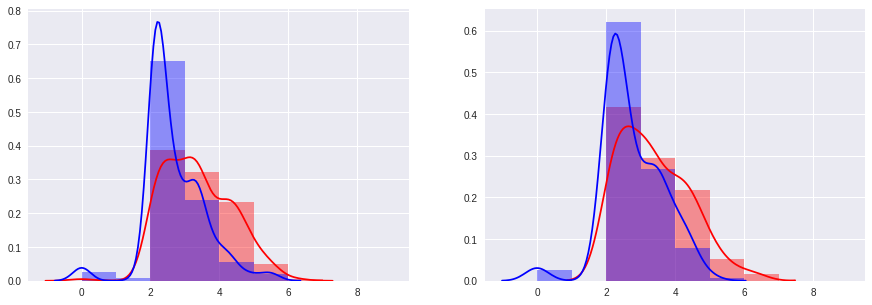

In [0]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5)) 
sns.distplot(X_train[X_train.Survived==1]['Fare'].dropna().values, bins=range(0, 10, 1),color='red', ax=axis1) 
sns.distplot(X_train[X_train.Survived==0]['Fare'].dropna().values, bins=range(0, 10, 1),color = 'blue', ax=axis1) 

sns.distplot(X_test[X_test.Survived==1]['Fare'].dropna().values, bins=range(0, 10, 1),color='red', ax=axis2) 
sns.distplot(X_test[X_test.Survived==0]['Fare'].dropna().values, bins=range(0, 10, 1),color = 'blue', ax=axis2) 

In [0]:
train['Fare'] = train['Fare'] + 1
test['Fare'] = test['Fare'] + 1

train['Fare'] = train['Fare'].apply(np.log)
test['Fare'] = test['Fare'].apply(np.log) 

In [0]:
train['Fare_0_2'] = np.int32(train['Fare'] <= 2)
train['Fare_2_3'] = np.int32((train['Fare'] > 2) & (train['Fare'] <= 3) )
train['Fare_3_4'] = np.int32((train['Fare'] > 3) & (train['Fare'] <= 4) )
train['Fare_4_5'] = np.int32((train['Fare'] > 4) & (train['Fare'] <= 5)) 
train['Fare_5_'] = np.int32(train['Fare'] > 5)


test['Fare_0_2'] = np.int32(test['Fare'] <= 2)
test['Fare_2_3'] = np.int32((test['Fare'] > 2) & (test['Fare'] <= 3) )
test['Fare_3_4'] = np.int32((test['Fare'] > 3) & (test['Fare'] <= 4) )
test['Fare_4_5'] = np.int32((test['Fare'] > 4) & (test['Fare'] <= 5)) 
test['Fare_5_'] = np.int32(test['Fare'] > 5)

# 3.模型训练
**3.1 训练集,测试集准备**

**冗余数据以及文本数据删除**

因为model一般只能处理数值型数据,所以此处我们将一些文本类数据以及一些冗余数据(经过one-hot编码还未删除的数据),有一些例如Fare数据此处我们选择保留,主要考虑其是连续型数据同时分布范围较大,我们的编码会遗漏很多信息,所以选择进行保留.(当然另外一方面也是发现线上性能缺失有细微提升).

**共同列提取与对齐**

我们训练集和测试集的列的排列有时会存在乱序以及训练集比测试集(dummy)的时候会多或者少一些列,所以这时我们提取训练集和测试集共有的列进行训练和测试.

In [98]:
train.drop(['Ticket','PassengerId','Name','Age','Cabin','Pclass'],axis =1, inplace=True)
test.drop(['PassengerId','Ticket','Name','Age','Cabin','Pclass'],axis =1, inplace=True)     

# train.drop(['Ticket','PassengerId','Name','Cabin','Pclass'],axis = 1, inplace=True)
# test.drop( ['PassengerId','Ticket','Name','Cabin','Pclass'],axis =1, inplace=True)     

# 0.808
# train.drop(['Ticket','PassengerId','Name','Cabin','Age','Pclass'],axis = 1, inplace=True)
# test.drop( ['PassengerId','Ticket','Name','Cabin','Age','Pclass'],axis =1, inplace=True)    

KeyError: ignored

In [0]:
X_train_ = train.loc[X_train.index]
X_test_ = train.loc[X_test.index]

Y_train_ = label.loc[X_train.index]
Y_test_ = label.loc[X_test.index]

X_test_ = X_test_[X_train_.columns]

In [95]:
pd.set_option('display.max_columns',50)
train.head()

,Fare,Sex_0,Sex_1,Name_Title_1,Name_Title_2,Name_Title_4,Name_Title_5,Name_len,Ticket_Frist_Letter_1,Ticket_Frist_Letter_2,Ticket_Frist_Letter_3,Ticket_Frist_Letter_4,Ticket_Frist_Letter_5,Ticket_Frist_Letter_6,Ticket_Frist_Letter_7,Ticket_Frist_Letter_8,Ticket_Frist_Letter_9,Ticket_Frist_Letter_10,Ticket_Frist_Letter_11,Cabin_First_Letter_1,Cabin_First_Letter_2,Cabin_First_Letter_3,Cabin_First_Letter_4,Cabin_First_Letter_5,Embarked_C,Embarked_Q,Embarked_S,Fam_Size_Big,Fam_Size_Nuclear,Fam_Size_Solo,Pclass_1,Pclass_2,Pclass_3,Small_Age,Old_Age,Middle_Age,Fare_0_2,Fare_2_3,Fare_3_4,Fare_4_5,Fare_5_
0,1.134691,0,1,1,0,0,0,23,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0
1,1.664038,1,0,0,1,0,0,51,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,1.159662,1,0,0,0,0,1,22,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
3,1.607603,1,0,0,1,0,0,44,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0
4,1.164014,0,1,1,0,0,0,24,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [96]:
test = test[train.columns]

KeyError: ignored

In [99]:
rf_ = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
#                              max_depth=5,
                             min_samples_split=16,
                             min_samples_leaf=1,
                             max_features='auto',  
                             random_state=10,
                             n_jobs=-1) 
rf_.fit(X_train_,Y_train_) 
rf_.score(X_test_,Y_test_)

0.7910447761194029

In [100]:
rf_.fit(train,label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=16,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

**3.3 模型特征重要性检测**

In [101]:
pd.concat((pd.DataFrame(train.columns, columns = ['variable']), 
           pd.DataFrame(rf_.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
2,Sex_1,0.130532
3,Name_Title_1,0.127750
1,Sex_0,0.126009
0,Fare,0.096454
7,Name_len,0.082786
6,Name_Title_5,0.054485
32,Pclass_3,0.046701
19,Cabin_First_Letter_1,0.035305
4,Name_Title_2,0.033382
27,Fam_Size_Big,0.031934


# 4.算法结果提交

In [107]:
submit = pd.read_csv('/content/gender_submission.csv')
submit.set_index('PassengerId',inplace=True)

res_rf = rf_.predict(test)
submit['Survived'] = res_rf
submit['Survived'] = submit['Survived'].apply(int)
submit.to_csv('submit.csv')

ValueError: ignored

# 5.总结
**本篇notebook是个人为了防止过拟合而采用的特征构造的方法,从线上线下的效果来看，该方法能较好的防止过拟合,线上线下的性能也较为满意.**
**所有的特征中肯定还存在一些相关性较高的特征，可以考虑删除来增加模型的鲁棒性, 本篇notebook中feature selection的部分尚有很多补充部分.**
**考虑加入机器学习的特征,来进一步探索.(不过因为该实验的数据较少,所以这些方法会在后面的一些比赛案例中展示)**
**采用其他模型的进行尝试,采用ensemble的方式进一步提升线上性能**
另外一个线上0.842点结果可以直接参考notebook<font color=red>From_kaggle_0.83767_0.84211</font>